<a href="https://colab.research.google.com/github/2653319/2021IMDB/blob/main/2021IMBD_%E9%80%8F%E9%81%8E%E6%95%B8%E5%AD%97%E9%A0%90%E6%B8%AC%E7%B5%90%E6%9E%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#測試結果表單


In [ ]:
#測試結果表單
!gdown https://drive.google.com/u/0/uc?id=1xUMmQWzYrXGgakxDL3aVhXslvcpHrWsM&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1xUMmQWzYrXGgakxDL3aVhXslvcpHrWsM
To: /content/110080_TestResult.csv
100% 49.5k/49.5k [00:00<00:00, 51.0MB/s]


#測試資料


In [ ]:
#測試資料
!gdown https://drive.google.com/u/0/uc?id=1cvEBOJDrhmoI2fJCL-syOwfr_nTbe9VP&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1cvEBOJDrhmoI2fJCL-syOwfr_nTbe9VP
To: /content/2021test0831.csv
100% 492k/492k [00:00<00:00, 68.3MB/s]


#訓練資料


In [ ]:

!gdown https://drive.google.com/u/0/uc?id=1x_m6yQSXffwzxGWNupTdVmUB1RL6XeZp&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1x_m6yQSXffwzxGWNupTdVmUB1RL6XeZp
To: /content/train20210817v2.csv
7.35MB [00:00, 64.5MB/s]


主程式碼


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
#Read training data
df_train = pd.read_csv('train20210817v2.csv')
df_train.shape

(98072, 15)

In [ ]:
df_input1 = pd.DataFrame()  

In [ ]:
df_input1['r1']=df_train['F_1']/24000  
df_input1['r2']=df_train['F_2']/31
df_input1['r3']=df_train['F_3']/31
df_input1['r4']=df_train['F_4']/31
df_input1['r5']=df_train['F_5']/31
df_input1['r6']=df_train['F_6']/31
df_input1['r7']=df_train['F_7']/31
df_input1['r8']=df_train['F_8']/31
df_input1['r9']=df_train['F_9']/31
df_input1['r10']=df_train['F_10']/31
df_input1['r11']=df_train['F_11']/31
df_input1['r12']=df_train['F_12']/31
df_input1['r13']=df_train['F_13']/31

In [ ]:
df_output1=pd.DataFrame(df_train['O']/85)  

In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=13))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(units=10, activation='relu'))
model1.add(Dense(1))

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 37,397
Trainable params: 37,397
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='mse', optimizer='adam')

In [ ]:
X=df_input1.to_numpy()

In [ ]:
y=df_output1.to_numpy()

In [ ]:
model1.fit(X, y, epochs=4000, batch_size=1024, verbose=1)

串流輸出內容已截斷至最後 5000 行。
96/96 [==============================] - 2s 16ms/step - loss: 0.0014
Epoch 1502/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0013
Epoch 1503/4000
96/96 [==============================] - 2s 17ms/step - loss: 0.0014
Epoch 1504/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0017
Epoch 1505/4000
96/96 [==============================] - 2s 17ms/step - loss: 0.0016
Epoch 1506/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0014
Epoch 1507/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0016
Epoch 1508/4000
96/96 [==============================] - 2s 17ms/step - loss: 0.0017
Epoch 1509/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0015
Epoch 1510/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0018
Epoch 1511/4000
96/96 [==============================] - 2s 16ms/step - loss: 0.0015
Epoch 1512/4000
96/96 [==============================] - 2s 

In [ ]:
yhat = model1.predict(X)   

In [ ]:
y.shape

(98072, 1)

In [ ]:
dataset=y.reshape(-1, 1)   

In [ ]:
dataset.shape

(98072, 1)

In [ ]:
def create_dataset(dataset1, dataset2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset1)-look_back-1): 
        a = dataset1[i:(i+look_back), 0]   
        dataX.append(a)                 
        dataY.append(dataset2[i + look_back, 0])
    return np.array(dataX), np.array(dataY) 

In [ ]:
dataset1 = yhat   
dataset2 = y      

In [ ]:
look_back = 340
allX, allY = create_dataset(dataset1, dataset2, look_back)

In [ ]:
allX.shape

(97731, 340)

In [ ]:
allY.shape

(97731,)

In [ ]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))   

In [ ]:
model2 = Sequential()
model2.add(LSTM(25, input_shape=(1, look_back)))
model2.add(Dropout(0.2))
model2.add(Dense(1))

In [ ]:
model2.compile(loss='mse', optimizer='adam')

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25)                36600     
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 36,626
Trainable params: 36,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(allX, allY, epochs=400, batch_size=240, verbose=1)

Epoch 1/400
408/408 [==============================] - 4s 5ms/step - loss: 0.0110
Epoch 2/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 3/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0038
Epoch 4/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0035
Epoch 5/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 6/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0029
Epoch 7/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0028
Epoch 8/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0027
Epoch 9/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0026
Epoch 10/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0025
Epoch 11/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0024
Epoch 12/400
408/408 [==============================] - 2s 5ms/step - loss: 0.0024
Epoch 13/400


In [ ]:
allPredict= model2.predict(allX)

In [ ]:
result = yhat*85

In [ ]:
result.shape

(98072, 1)

In [ ]:
result[look_back:len(yhat)-1, :] = allPredict*85

In [ ]:
df_Ans = pd.DataFrame()
df_Ans["O"] = df_train["O"]
df_Ans["O_hat"] = result
df_Ans["yhat"] = yhat*85

In [ ]:
df_Ans['error'] = abs(df_Ans["O"] - df_Ans["O_hat"]) 
#df_Ans['error2'] = abs(df_Ans["O"] - df_Ans["yhat"])  
#df_Ans['error3'] = abs(df_Ans["O_hat"] - df_Ans["yhat"])

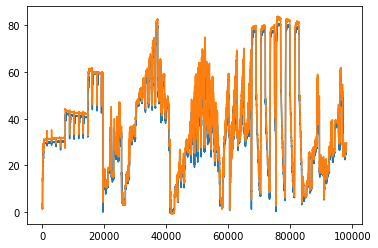

In [ ]:
plt.plot(result)
plt.plot(yhat*85)    
plt.show()

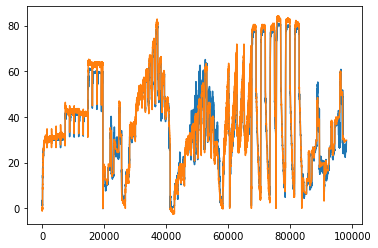

In [ ]:
plt.plot(result) 
plt.plot(df_train['O'])  
plt.show()

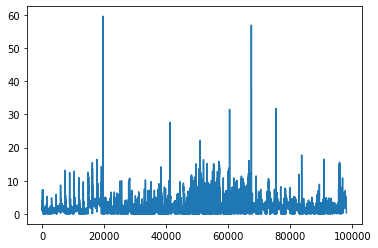

In [ ]:
plt.plot(df_Ans['error'])   
plt.show()

測試資料

In [ ]:
df_test = pd.read_csv('2021test0831.csv')
df_test.shape

(7222, 14)

In [ ]:
df_Test_input = pd.DataFrame()

In [ ]:
df_Test_input['r1']=df_test['F_1']/24000
df_Test_input['r2']=df_test['F_2']/31
df_Test_input['r3']=df_test['F_3']/31
df_Test_input['r4']=df_test['F_4']/31
df_Test_input['r5']=df_test['F_5']/31
df_Test_input['r6']=df_test['F_6']/31
df_Test_input['r7']=df_test['F_7']/31
df_Test_input['r8']=df_test['F_8']/31
df_Test_input['r9']=df_test['F_9']/31
df_Test_input['r10']=df_test['F_10']/31
df_Test_input['r11']=df_test['F_11']/31
df_Test_input['r12']=df_test['F_12']/31
df_Test_input['r13']=df_test['F_13']/31

In [ ]:
X=df_Test_input.to_numpy()

In [ ]:
yhat = model1.predict(X)

In [ ]:
yhat.shape

(7222, 1)

In [ ]:
allX, allY = create_dataset(yhat, yhat, look_back)

In [ ]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))

In [ ]:
allPredict= model2.predict(allX)

In [ ]:
allPredict.shape

(6881, 1)

In [ ]:
result = yhat

In [ ]:
result[look_back:len(yhat)-1, :] = allPredict

In [ ]:
result = result*85

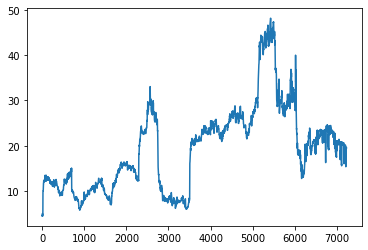

In [ ]:
plt.plot(result)
plt.show()

In [ ]:
df_AnsTest = pd.read_csv('110080_TestResult.csv')

In [ ]:
df_AnsTest["預測值"] = result

In [ ]:
df_AnsTest

,編號,預測值
0,1,4.391764
1,2,4.391764
2,3,4.391764
3,4,4.391764
4,5,4.391764
...,...,...
7217,7218,19.344934
7218,7219,19.454359
7219,7220,19.624903
7220,7221,19.640240


In [ ]:
df_AnsTest.to_excel('110080_TestResult.xlsx')